In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st


In [33]:
%store -r select_states_population_change_df
%store -r select_states_sales_df
%store -r select_states_total_population_df 

In [3]:
select_states_population_df

,STNAME,CTYNAME,Popestimate Yearly Change 2011(%),Popestimate Yearly Change 2012(%),Popestimate Yearly Change 2013(%),Popestimate Yearly Change 2014(%),Popestimate Yearly Change 2015(%),Popestimate Yearly Change 2016(%),Popestimate Yearly Change 2017(%),Popestimate Yearly Change 2018(%),Popestimate Yearly Change 2019(%),Popestimate Yearly Change 2020(%),Popestimate 10-Year Change 2020(%)
0,District of Columbia,District of Columbia,1.024795,1.024903,1.024888,1.018485,1.020209,1.015601,1.013821,1.010139,1.005831,1.006443,1.177659
1,Utah,Utah,1.014190,1.013979,1.015636,1.013645,1.015417,1.020316,1.019479,1.016630,1.015286,1.014515,1.170953
2,Texas,Texas,1.015990,1.017103,1.015163,1.018257,1.018746,1.016220,1.013504,1.011790,1.012655,1.012901,1.163176
49,Illinois,Illinois,1.002121,1.001185,1.000990,0.999171,0.998020,0.997055,0.996739,0.995680,0.995468,0.993725,0.980296
50,West Virginia,West Virginia,1.001262,1.000452,0.998558,0.997736,0.996089,0.994088,0.992495,0.993000,0.994081,0.994165,0.962531


In [4]:
select_states_population_df.columns

Index(['STNAME', 'CTYNAME', 'Popestimate Yearly Change 2011(%)',
       'Popestimate Yearly Change 2012(%)',
       'Popestimate Yearly Change 2013(%)',
       'Popestimate Yearly Change 2014(%)',
       'Popestimate Yearly Change 2015(%)',
       'Popestimate Yearly Change 2016(%)',
       'Popestimate Yearly Change 2017(%)',
       'Popestimate Yearly Change 2018(%)',
       'Popestimate Yearly Change 2019(%)',
       'Popestimate Yearly Change 2020(%)',
       'Popestimate 10-Year Change 2020(%)'],
      dtype='object')

In [14]:
select_states_sales_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
StateName,,,,,,,,,,,
IL,59779.0,59571,74902,93725,100689,113144,123797.0,123867,129384,122175,135944.0
TX,93241.0,94298,112232,134382,136227,144533,151306.0,154065,154210,158770,173511.0
UT,18356.0,19235,24019,27369,27877,33008,35399.0,34867,33972,34607,36991.0
VA,70839.0,65667,75558,87705,84784,95447,104942.0,111890,110752,115225,128283.0
WA,26889.0,27330,37158,46846,48530,57052,63002.0,65469,60361,58065,59939.0


In [16]:
# Rename stateName to State
select_states_sales_df = select_states_sales_df.rename(columns={'StateName': 'State'})
select_states_sales_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
StateName,,,,,,,,,,,
IL,59779.0,59571,74902,93725,100689,113144,123797.0,123867,129384,122175,135944.0
TX,93241.0,94298,112232,134382,136227,144533,151306.0,154065,154210,158770,173511.0
UT,18356.0,19235,24019,27369,27877,33008,35399.0,34867,33972,34607,36991.0
VA,70839.0,65667,75558,87705,84784,95447,104942.0,111890,110752,115225,128283.0
WA,26889.0,27330,37158,46846,48530,57052,63002.0,65469,60361,58065,59939.0


In [17]:
#Change the name of the header 
select_states_population_yearly_change_df = select_states_population_df.rename(columns={
    'STNAME': 'State',
    'Popestimate Yearly Change 2011(%)': '2011',
    'Popestimate Yearly Change 2012(%)': '2012',
    'Popestimate Yearly Change 2013(%)': '2013',
    'Popestimate Yearly Change 2014(%)': '2014',
    'Popestimate Yearly Change 2015(%)': '2015',
    'Popestimate Yearly Change 2016(%)': '2016',
    'Popestimate Yearly Change 2017(%)': '2017',
    'Popestimate Yearly Change 2018(%)': '2018',
    'Popestimate Yearly Change 2019(%)': '2019',
    'Popestimate Yearly Change 2020(%)': '2020'
})

select_states_population_yearly_change_df.pop('Popestimate 10-Year Change 2020(%)')
select_states_population_yearly_change_df.pop('CTYNAME')
select_states_population_yearly_change_df

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,District of Columbia,1.024795,1.024903,1.024888,1.018485,1.020209,1.015601,1.013821,1.010139,1.005831,1.006443
1,Utah,1.014190,1.013979,1.015636,1.013645,1.015417,1.020316,1.019479,1.016630,1.015286,1.014515
2,Texas,1.015990,1.017103,1.015163,1.018257,1.018746,1.016220,1.013504,1.011790,1.012655,1.012901
49,Illinois,1.002121,1.001185,1.000990,0.999171,0.998020,0.997055,0.996739,0.995680,0.995468,0.993725
50,West Virginia,1.001262,1.000452,0.998558,0.997736,0.996089,0.994088,0.992495,0.993000,0.994081,0.994165


In [18]:
# Create a dictionary to rename the states
rename_dict = {'District of Columbia': 'WA', 'Utah': 'UT', 'Texas': 'TX', 'Illinois': 'IL', 'West Virginia': 'VA'}

In [20]:
# Rename the states
select_states_population_yearly_change_df['State'] = select_states_population_yearly_change_df['State'].replace(rename_dict)
select_states_population_yearly_change_df

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,WA,1.024795,1.024903,1.024888,1.018485,1.020209,1.015601,1.013821,1.010139,1.005831,1.006443
1,UT,1.014190,1.013979,1.015636,1.013645,1.015417,1.020316,1.019479,1.016630,1.015286,1.014515
2,TX,1.015990,1.017103,1.015163,1.018257,1.018746,1.016220,1.013504,1.011790,1.012655,1.012901
49,IL,1.002121,1.001185,1.000990,0.999171,0.998020,0.997055,0.996739,0.995680,0.995468,0.993725
50,VA,1.001262,1.000452,0.998558,0.997736,0.996089,0.994088,0.992495,0.993000,0.994081,0.994165


In [29]:
# Set the StateName column as the index
df.set_index('State', inplace=True)

# Transpose the dataframe for easier plotting
df_transposed = df.transpose()

# Plot the data
df_transposed.plot(kind='line', marker='o')

# Set the chart title and labels
plt.title('Population yearly Change by State')
plt.xlabel('Year')
plt.ylabel('Sales')

# Display the chart
plt.show()

KeyError: "None of ['State'] are in the columns"

In [25]:
select_states_sales_df


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
StateName,,,,,,,,,,,
IL,59779.0,59571,74902,93725,100689,113144,123797.0,123867,129384,122175,135944.0
TX,93241.0,94298,112232,134382,136227,144533,151306.0,154065,154210,158770,173511.0
UT,18356.0,19235,24019,27369,27877,33008,35399.0,34867,33972,34607,36991.0
VA,70839.0,65667,75558,87705,84784,95447,104942.0,111890,110752,115225,128283.0
WA,26889.0,27330,37158,46846,48530,57052,63002.0,65469,60361,58065,59939.0


In [23]:
# Set the StateName column as the index
df.set_index('StateName', inplace=True)

# Transpose the dataframe for easier plotting
df_transposed = df.transpose()

# Plot the data
df_transposed.plot(kind='line', marker='o')

# Set the chart title and labels
plt.title('Sales by State')
plt.xlabel('Year')
plt.ylabel('Sales')

# Display the chart
plt.show()

KeyError: "None of ['Year'] are in the columns"

In [ ]:
# Plot a line chart for each state
for state in combined_df.columns:
    if state != 'Year':
        plt.plot(combined_df.index, combined_df[state], label=state)

# Set plot labels and legend
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.legend(title='State')

# Display the plot
plt.show()

In [27]:
# Create the dataframe
data = {
    '2010': [59779.0, 26889.0],
    '2011': [59574, 27330],
    'StateName': ['TIL', 'WA'],
    '2012': [90241.0, 2012],
    '2013': [94298, 74902],
    '2014': [18356.0, 112232],
    '2015': [19295, 24019],
    '2016': [70839.0, 75558],
    '2017': [65667, 37158],
    '2018': [59779.0, 2013],
    '2019': [90241.0, 2014],
    '2020': [94298, 2015]
}

df = pd.DataFrame(data)

df

,2010,2011,StateName,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,59779.0,59574,TIL,90241.0,94298,18356.0,19295,70839.0,65667,59779.0,90241.0,94298
1,26889.0,27330,WA,2012.0,74902,112232.0,24019,75558.0,37158,2013.0,2014.0,2015


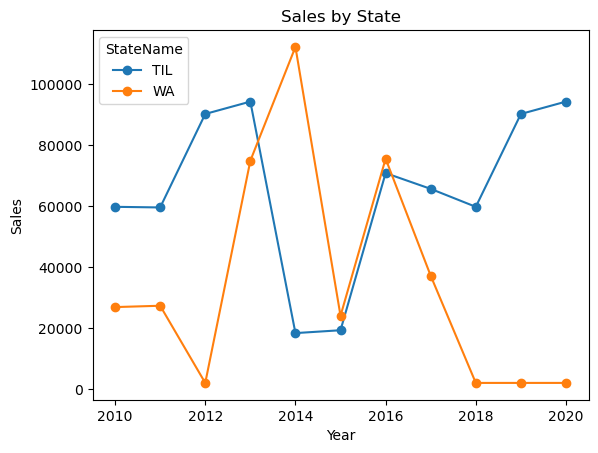

In [28]:
# Set the StateName column as the index
df.set_index('StateName', inplace=True)

# Transpose the dataframe for easier plotting
df_transposed = df.transpose()

# Plot the data
df_transposed.plot(kind='line', marker='o')

# Set the chart title and labels
plt.title('Sales by State')
plt.xlabel('Year')
plt.ylabel('Sales')

# Display the chart
plt.show()